In [1]:
#copied and pasted the first cell from the data_visualization notebook with all the import statements

#visualization tools
import matplotlib.pyplot as plt #matplotlib is a basic plotting library
import seaborn as sns #seaborn is a library that uses matplotlib to make styled plots
import plotly_express as px #plotly express is a library for drawing interactive figures
import hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#data wrangling tools
import pandas as pd
import numpy as np

%matplotlib inline


/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning:

Could not switch backend to TkAgg.  This may impact performance of the plotting functions.



In [2]:
#import happiness data
happiness_data = pd.read_csv('../../../../data-stories/happiness/GSS 4.csv')
happiness_data = pd.DataFrame(happiness_data)

In [3]:
#view first 5 rows
happiness_data.head(20)

,Unnamed: 0,age,region,health,general_happy,past_week_happy,see_friends,see_relatives,income,work_hours,job_satisfaction,weekend_internet,weekday_internet,use_twitter,internet_per_week
0,0,47.0,New england,Good,Pretty happy,NaN,Sev times a year,Almost daily,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
1,1,61.0,New england,NaN,Pretty happy,NaN,Sev times a year,Sev times a year,54999.0,NaN,Very satisfied,NaN,NaN,No,NaN
2,2,72.0,New england,Good,Very happy,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,3,43.0,New england,Good,Pretty happy,NaN,Sev times a week,Sev times a week,11249.0,NaN,Very satisfied,NaN,NaN,NaN,NaN
4,4,55.0,New england,Excellent,Very happy,Most of the time,NaN,NaN,1999.0,NaN,Mod. satisfied,1.0,1.0,No,7.0
5,5,53.0,New england,NaN,Very happy,NaN,Once a month,Sev times a year,NaN,NaN,Very satisfied,0.0,1.0,No,5.0
6,6,50.0,New england,Poor,Pretty happy,NaN,Sev times a week,Once a year,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
7,7,23.0,Middle atlantic,Good,Very happy,All or almost all of the time,NaN,NaN,16249.0,NaN,Very satisfied,3.0,2.0,No,16.0
8,8,45.0,Middle atlantic,Good,Pretty happy,NaN,Never,Once a year,21249.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
9,9,71.0,Middle atlantic,Good,Pretty happy,Most of the time,NaN,NaN,NaN,NaN,NaN,5.0,6.0,No,40.0


In [5]:
#data cleansing

def words_to_number(g): #function to change non-numerical values (ordinal data) to numerical values
    if g == 'Not too happy':
        return 1
    elif g == 'Pretty happy':
        return 2
    elif g == 'Very happy':
        return 3
    elif g == 'Poor':
        return 1
    elif g == 'Good':
        return 2
    elif g == 'Fair':
        return 3
    elif g == 'Excellent':
        return 4
    elif g == 'Very dissatisfied':
        return 1
    elif g == 'A little dissat':
        return 2
    elif g == 'Mod. satisfied':
        return 3
    elif g == 'Very satisfied':
        return 4
    
    

happiness_data = happiness_data.drop(['Unnamed: 0', 'region', 'past_week_happy', 'use_twitter', 
                                      'see_friends', 'see_relatives', 'weekend_internet',
                                      'weekday_internet'],axis=1) #drop irrelevant columns 


names = {'age': 'Age',
         'health': 'Health',
         'general_happy': 'General Happiness',
         'income': 'Income',
         'work_hours' : 'Work Hours',
         'job_satisfaction' : 'Job Satisfaction',
         'internet_per_week' : 'Internet per Week'} #create dictionary of column names

happiness_data.rename(names, inplace=True, axis=1) #Change the spacing and capitalization of column names


#change non-numerical columns to numerical
happiness_data['Health'] = happiness_data['Health'].apply(words_to_number)
happiness_data['General Happiness'] = happiness_data['General Happiness'].apply(words_to_number)
happiness_data['Job Satisfaction'] = happiness_data['Job Satisfaction'].apply(words_to_number)


happiness_data = happiness_data.fillna(0) #replace NaN values with 0 


happiness_data.head()


,Age,Health,General Happiness,Income,Work Hours,Job Satisfaction,Internet per Week
0,47.0,2.0,2.0,170000.0,0.0,3.0,0.0
1,61.0,0.0,2.0,54999.0,0.0,4.0,0.0
2,72.0,2.0,3.0,0.0,0.0,0.0,0.0
3,43.0,2.0,2.0,11249.0,0.0,4.0,0.0
4,55.0,4.0,3.0,1999.0,0.0,3.0,7.0


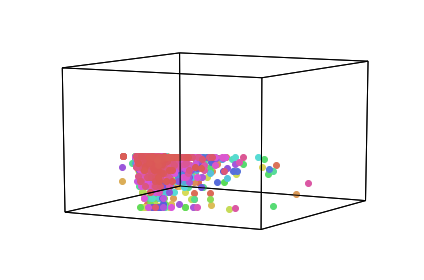

In [18]:
#begin with a hyper plot to just get a sense of the data and see if there is any clustering

hyp.plot(happiness_data, 'o', hue=np.array(happiness_data.index), reduce='FastICA'); 

In [12]:
#plot data; scatterplot of general happiness, age, and income of each data point

px.scatter(happiness_data, x='General Happiness', y='Age', color = 'Income')

In [17]:
#another simple scatterplot

px.scatter(happiness_data, x='Income', y='Age', color = 'Job Satisfaction')


I used scatterplots to visualize three variables at once, one on each axis and a thrid variable tracked by hue of the data points. I found a weak trend that general happiness increases with income and a slightly stronger trend that job satisfaction increases with income.

In [7]:
happiness_data_values = happiness_data.values #extract data from dataframe as numpy array
happiness_data_values #display numpy array

array([[47.,  2.,  2., ...,  0.,  3.,  0.],
       [61.,  0.,  2., ...,  0.,  4.,  0.],
       [72.,  2.,  3., ...,  0.,  0.,  0.],
       ...,
       [72.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
#do some basic analysis on the numpy array
#calculated a standard deviation plus dimensionality, shape and size of the array; 
#not super relevant for this dataset but it's what I knew how to do!

print(np.std(happiness_data_values))
print("happiness_data_values ndim: ", happiness_data_values.ndim)
print("happiness_data_values shape:", happiness_data_values.shape)
print("happiness_data_values size: ", happiness_data_values.size)

16640.55083142345
happiness_data_values ndim:  2
happiness_data_values shape: (2869, 7)
happiness_data_values size:  20083


# Findings

By taking ordinal data (i.e. general happiness ratings, health, and job satisfaction) and converting different ratings into numerical scores, I was able to plot and analyze these variables along different metrics such as age and income. Somewhat predictably, I found positive correlation between income and job satisfacion as well as income and general happiness. 